# SSM-NOISE Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the SSM-NOISE product created by TU Wien. This product shows the noise of the relative surface soil moisture estimate

The product name in the ACube is `SSMNOISE_Sentinel_1`. It is composed of a single measurement `VV`.

Relevant links:
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.4.%20data%20processing%20levels/3.4.3.%20Sentinel-1%20products/
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.1.%20Sentinel-1%20data/3.4.1.3.%20Products/3.4.1.3.5.%20Surface%20Soil%20Moisture/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 500 m. We also list the metadata fields that are available.

In [1]:
import datacube
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_ssmnoise')
product = 'SSMNOISE_Sentinel_1'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,instrument,product_type,format,platform,crs,resolution,spatial_dimensions
id,,,,,,,,,
22,SSMNOISE_Sentinel_1,Noise of the relative surface soil moisture es...,SAR,TUW_SSM-NOISE_S1,GeoTIFF,Sentinel-1,"PROJCS[""Azimuthal_Equidistant"",GEOGCS[""GCS_WGS...","[-500, 500]","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

,,aliases,dtype,name,nodata,units
product,measurement,,,,,
SSMNOISE_Sentinel_1,VV,"[band_1, band_01, B01, Band1, Band_1]",uint8,VV,255,1


In [4]:
query = {
    'lat': (48.00, 48.5),
    'lon': (16.0, 16.5),
    'time': ('2019-05-01', '2019-05-02')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['creation_dt', 'csw_link', 'extent', 'format', 'granule_id', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'orbit', 'platform', 'product_format', 'product_type']
****************************************************************************************************
METADATA
{'creation_dt': '2019-10-30T21:22:05.922659',
 'csw_link': 'https://csw-acube.eodc.eu//?service=CSW&version=3.0.0&request=GetRecordById&id=SSM-NOISE_SGRTC01_S1A_IWGRDH1VVD_20190502_050929--_EU500M_E048N012T6&elementSetName=full&outputSchema=http://www.isotc211.org/2005/gmd&outputformat=application/xml',
 'extent': {'center_dt': '2019-05-02T05:09:29',
            'coord': {'ll': {'lat': 43.90398467125304,
                             'lon': 11.080196680386718},
                      'lr': {'lat': 44.569285836432314,
                             'lon': 18.51004850640466},
             

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 2, x: 3803, y: 5619)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-02T05:09:29 2019-05-02T17:06:12
  * y        (y) float64 5.373e+06 5.373e+06 5.373e+06 ... 5.317e+06 5.317e+06
  * x        (x) float64 5.739e+05 5.739e+05 5.739e+05 ... 6.119e+05 6.119e+05
Data variables:
    VV       (time, y, x) uint8 15 15 15 15 15 15 15 ... 255 255 255 255 255 255
Attributes:
    crs:      EPSG:32633

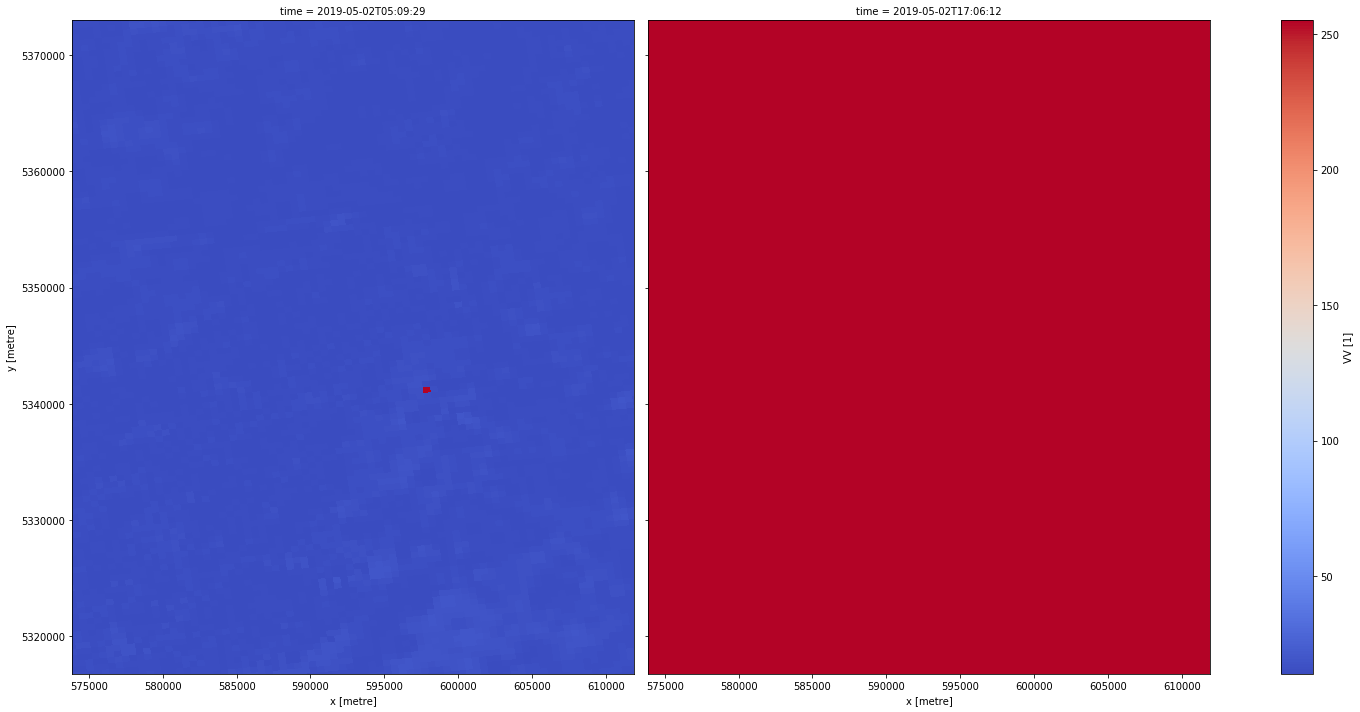

In [7]:
data.VV.plot.imshow(
    x=data.crs.dimensions[1], 
    y=data.crs.dimensions[0],
    col='time',
    size=10,
    col_wrap=2,
    cmap='coolwarm'
)